[Link to Kaggle Dataset](https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement)

In [19]:
import pandas as pd

In [20]:
data = pd.read_csv('Datasets/Placement_Data_Full_Class.csv')
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [21]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


## Problem in Hand

The aim here is to predict the salary based on the qualifications of the candidates as available or the least case to predict whether the candidate will be placed or not. Ultimately the attempt is to figure out what are the key factors which decide the selection of a candidate.

## Data Analysis

Using the data descriptions available as follows: 

`sl_no` : Serial Number 

`gender` : Gender- Male='M', Female='F' 

`ssc_p` : Secondary Education percentage- 10th Grade

`ssc_b` : Board of Education- Central/Others

`hsc_p` : Higher Secondary Education percentage- 12th Grade

`hsc_b` : Board of Education- Central/Others

`hsc_s` : Specialization in Higher Secondary Education

`degree_p` : Degree Percentage

`degree_t` : Under Graduation(Degree type)- Field of degree education

`workex` : Work Experience

`etest_p` : Employability test percentage (conducted by college)

`specialisation` : Post Graduation(MBA)- Specialization

`mba_p` : MBA percentage

`status` : Status of placement- Placed/Not placed

`salary` : Salary offered by corporate to candidates


Right now as an intial look-through, few difficulties present themselves like the presence of different boards which makes judging the percentages at the same level unfair and most probably inaccurate. So we will look at options where those are handled appropriately. But due to lack of data among the other boards(boards only having 2 choices `Central` and `Others`, basically having no division inside the non-central boards), we will have no choice other than to consider all `Others` boards entry equivalent.

Also here an oppurtunity presents itself, that is replacing all `NaN` values in the salary column with 0, though that might make sense in its literal terms but it would highly skew the results towards a lower salary as the difference in the qualities of someone placed and someone not placed might not be as major as the difference in 0 and some XX...XX salary would suggest.

Hence as an initial outlook, we now have two options that is using two distinct models; one to classify placed and not placed and one to predict the salary, and only present the salary if the candidate is classified as placed (We will can this Plan A); alternatively we can just use a regressive model to predict a salary and only classify the candidate as placed if it is above a certain threshold (Plan B).

Now Plan B might seem simpler but it has an issue that it will never present a salary lower than the threshold which might be possible, so Plan A as of now seems the more sensible choice as it is more flexible in terms of the ability of Status(Placed/Not Plaaced) and Salary being able to depend on different factors.

In [22]:
data['status']=data['status'].replace(['Placed','Not Placed'],[1,0]) #one-hot encoding the status
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1,425000.0


In [36]:
import seaborn as sns

ValueError: color kwarg must have one color per dataset

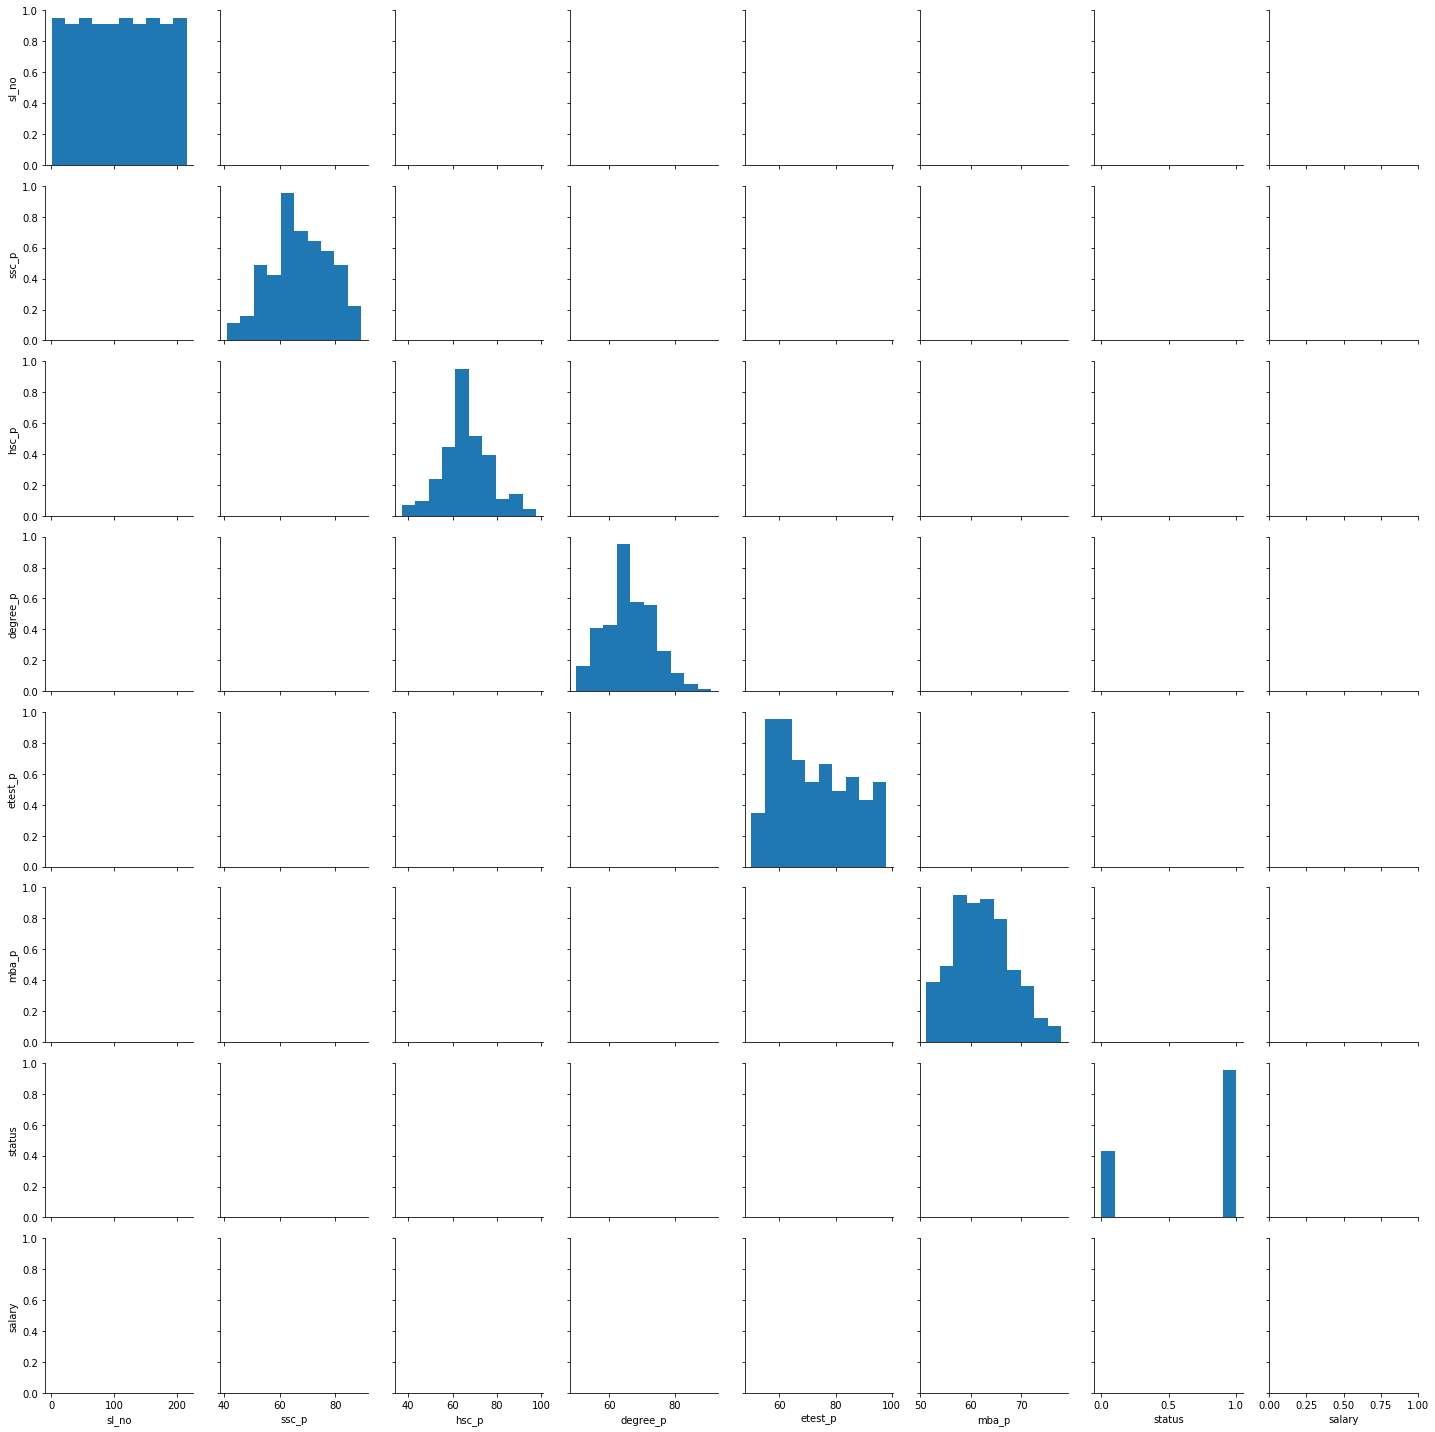

In [41]:
datacopy=data
datacopy['salary']=datacopy['salary'].fillna(0,inplace=True)

The classification of Placed or Not Placed can be done using SVM.

###### Refernces used: [1](), [2]()  ////empty